 modelo de regressão linear que prediga a variável meta (median_house_value) e cujo valor de RMSE seja menor ou igual a 69000. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# leitura dos dados
housing = pd.read_csv('bases/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Entendemos com essa informação que precisaremos tratar o total_bedrooms por conter valores nulos

- 9 variavéis númericas e 1 categórica


Temos dados que mostram que talvez não é apenas o total de cômodos ou banheiros de uma casa comum, mas sim de um condomínio ou prédio

<AxesSubplot:>

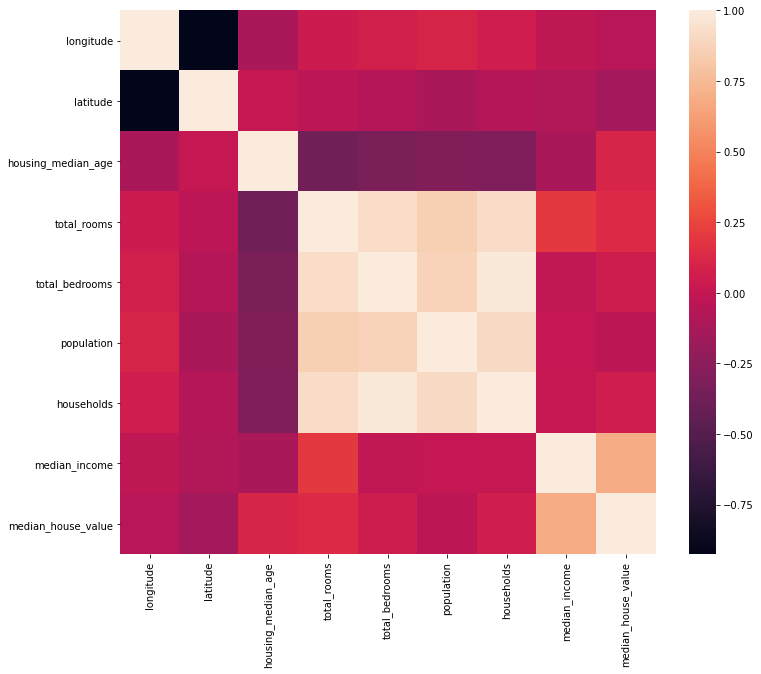

In [4]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(housing.corr())

Encontramos correlações óbvias como:
- total de quartos por total de cômodos
- população por quantidade de quartos e cômodos
- familias por quantidade de cômodos e quartos
- população por famílias

A principal correlação é 
- Sálario médio por valor médio de uma casa, o que faz sentido justamente pelo salário que uma pessoa ganha ser a base para o investimento de uma casa

#### Tratamento de valores nulos

In [5]:

housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<ipython-input-8-2571931460a2>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  housing.hist(ax=ax, bins=50)


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

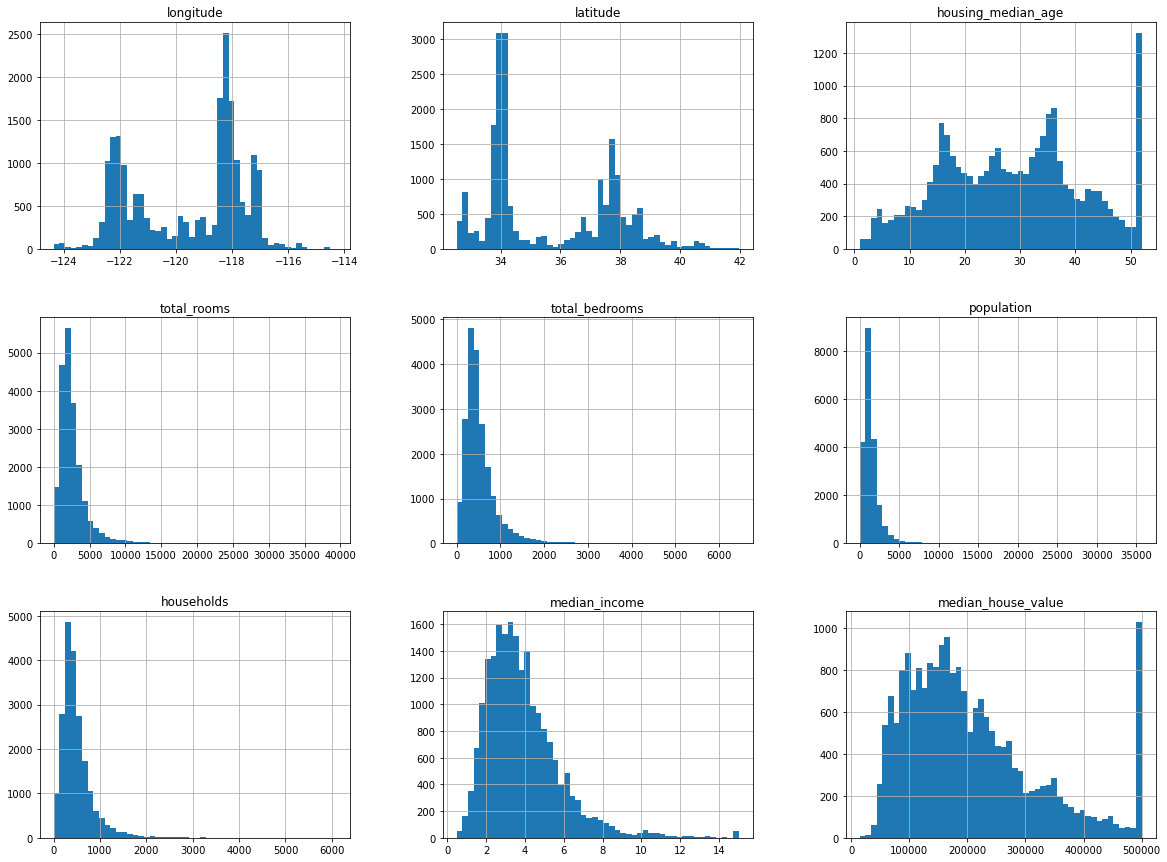

In [8]:
fig = plt.figure(figsize = (20, 15))
ax = fig.gca()
housing.hist(ax=ax, bins=50)

In [9]:
# No histograma 52 anos aparece com uma barra maior, vamos avaliar se mantemos esses dados
# Possuem muitas casas com o valor médio maior ou igual a 500000

print('median_house_value', housing['median_house_value'][housing.median_house_value > 500000].count())
print('housing_median_age', housing['housing_median_age'][housing.housing_median_age == 52].count())


median_house_value 965
housing_median_age 1273


O maior público tem 52 anos, o restante dos dados estão melhor distríbuidos

Como idade não tem correlação com a média de preços das casas (estamos analisando isso abaixo), vamos manter esses dados

Por algum problema existem muitas casas com o preço de 500001.0 vamos remover esses dados.

In [10]:
housing[housing.median_house_value > 500000].tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN
20443,-118.85,34.27,50.0,187.0,33.0,130.0,35.0,3.3438,500001.0,<1H OCEAN


In [11]:
housing = housing[housing.median_house_value < 500000]

<AxesSubplot:>

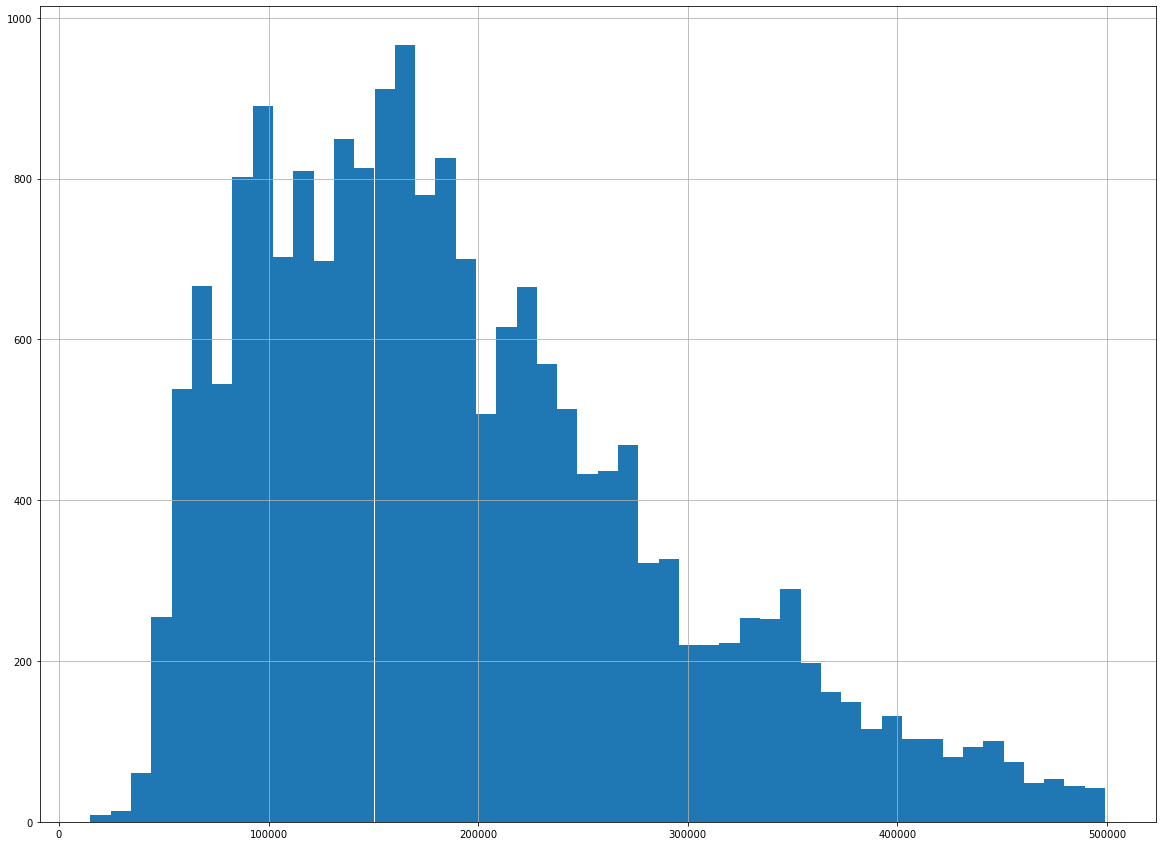

In [12]:
fig = plt.figure(figsize = (20, 15))
ax = fig.gca()
housing.median_house_value.hist(ax=ax, bins=50)

Agora temos uma melhor distribuição para a média de preços das casas

In [13]:
!pip install folium
import folium
from folium import plugins
heatMap = folium.Map([41, -96], zoom_start = 4)
heatMapCleanLoc = housing[np.isfinite(housing['latitude'])].sample(n=10000)

heatArr = heatMapCleanLoc[["latitude", "longitude"]]
heatMap.add_child(plugins.HeatMap(heatArr, radius = 15))

A região estudada para o preço das casas é nos EUA, englobando os condados da california

- salário mínimo por hora nos eua gira em torno de U$7.25

## Hipóteses

> 1) A média de idade interfere no preço médio da casa?

> 2) Distribuição de quartos e cômodos

> 3) Uma casa próxima ao oceano interfere no preço médio?

> 4) O salário médio interfere no preço médio da casa

## 1) A média de idade interfere no preço médio da casa?

In [14]:
housing['mean_age_cat'] = pd.cut(housing['housing_median_age'], bins=[1, 18, 29, 37, 52], include_lowest=True,
                                labels=["1-18", "18-29", "29-37", "37-52"])

housing['mean_age_cat2'] = pd.cut(housing['housing_median_age'], bins=[1, 18, 37, 52], include_lowest=True,
                                labels=["1-18", "18-37", "37-52"])

In [15]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,mean_age_cat,mean_age_cat2
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,37-52,37-52
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,18-29,18-37
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,37-52,37-52
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,37-52,37-52
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,37-52,37-52


In [16]:
grouped_by_age = housing.groupby('mean_age_cat').mean().sort_values(by='median_house_value', ascending=False)
grouped_by_age_2 = housing.groupby('mean_age_cat2').mean().sort_values(by='median_house_value', ascending=False)

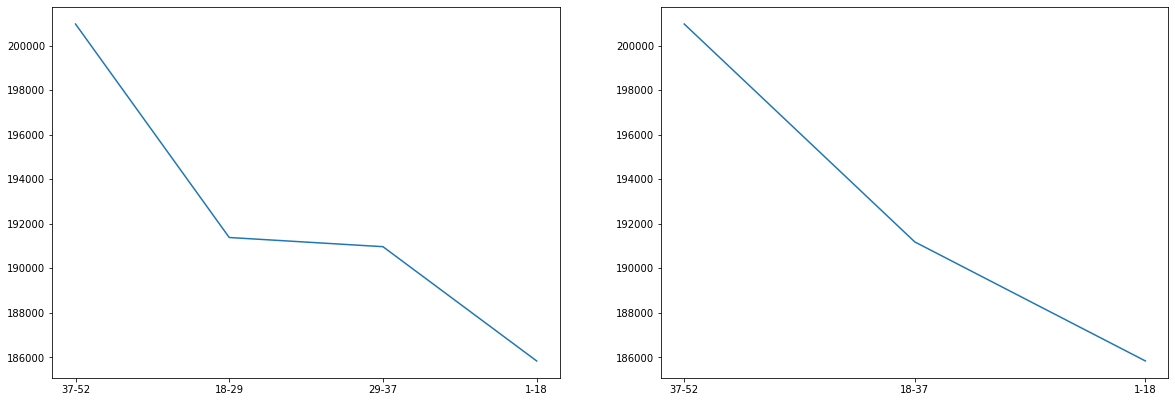

In [17]:
fig = plt.figure(figsize = (20, 15))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

ax1.plot(grouped_by_age.index, grouped_by_age.median_house_value)
ax2.plot(grouped_by_age_2.index, grouped_by_age_2.median_house_value)

Observa-se que o valor médio das casas por idade tende a aumentar de forma linear conforme o morador tem uma média maior de idade;

    dos 18 aos 37 anos os valores tendem a ter uma constância (gastos com filhos pode ser uma justificativa para não ter um aumento ou estudos/profissão mais estabilizada)

In [18]:
housing.drop(['mean_age_cat', 'mean_age_cat2'], axis=1, inplace=True)

## 2) Total de quartos e cômodos

Estamos criando novas colunas para quarto, cômodos e tamanho da casa. Convertendo square feet para m2.

para realizar a conversão é simplesmente pegar o tamanho em pés e dividir por 10.764

In [19]:
housing['total_rooms_m2'] = housing.total_rooms/10.764
housing['total_bedrooms_m2'] = housing.total_bedrooms/10.764
housing['total_size_m2'] = housing.total_rooms_m2 + housing.total_bedrooms_m2

In [20]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_m2,total_bedrooms_m2,total_size_m2
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,81.753995,11.984392,93.738387
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,659.513192,102.749907,762.263099
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,136.287625,17.651431,153.939056
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,118.357488,21.832033,140.189521
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,151.151988,26.012635,177.164623


In [21]:
housing.total_size_m2.quantile(0.5)

238.15496098104796

In [22]:
housing.total_size_m2.quantile(0.75)

349.7073578595318

Nota-se que  75% do dataset possuem casas de atpe 350 m2 e a mediana são casas de até 239 m2

In [23]:
housing.total_size_m2.quantile(0.9)

517.0011148272018

In [24]:
housing[housing.total_size_m2 >= 518.00]['total_size_m2'].count()

1960

10% da base tem casas com mais que 518m2, sendo um total estimado de 1960 registros de 19648 dados no total

<BarContainer object of 19648 artists>

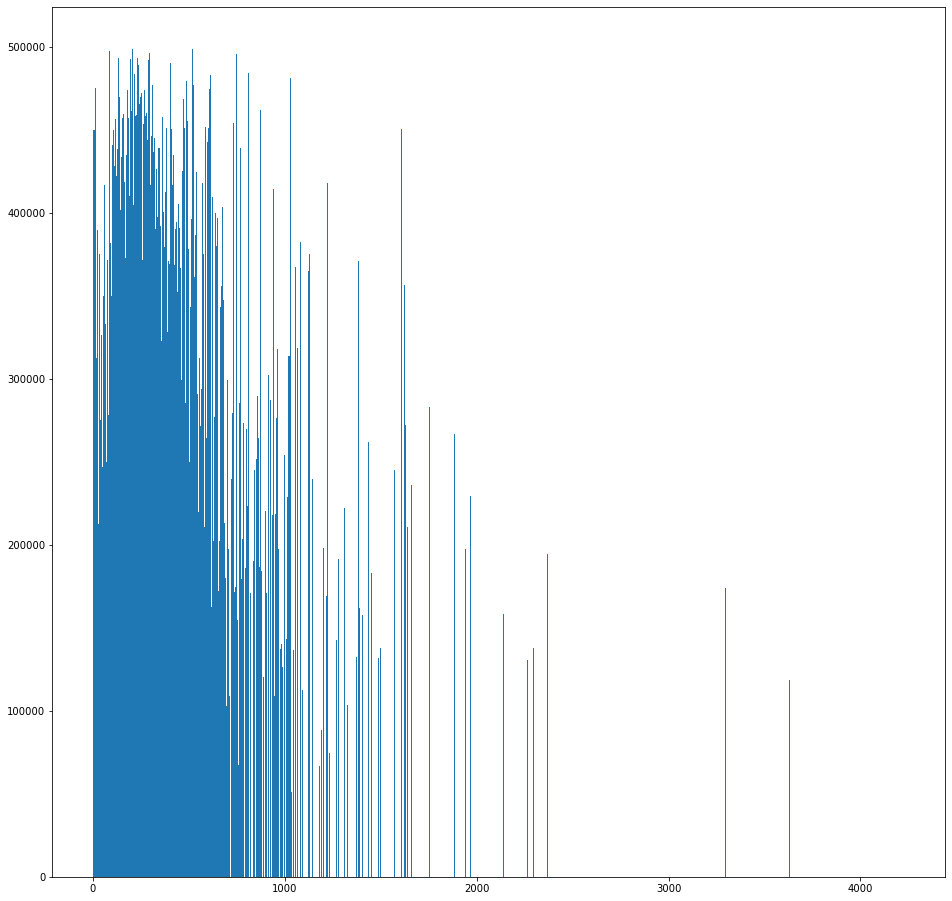

In [25]:
fig, ax = plt.subplots(figsize = (16, 16))
ax.bar(housing.total_size_m2, housing.median_house_value)

As casas que possuem em média 500m2 são as mais caras na base, porém existem algumas casas que foram mais baratas e com mais m2

In [26]:
housing.query('total_size_m2 > 2000').tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_m2,total_bedrooms_m2,total_size_m2
13139,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND,3652.917131,576.923077,4229.840208
13176,-117.75,34.01,4.0,22128.0,3522.0,10450.0,3258.0,6.1287,289600.0,<1H OCEAN,2055.741360,327.201784,2382.943144
13382,-117.59,34.13,10.0,20263.0,3915.0,9716.0,3744.0,3.8505,169600.0,INLAND,1882.478632,363.712375,2246.191007
13387,-117.61,34.10,9.0,18956.0,4095.0,10323.0,3832.0,3.6033,132600.0,INLAND,1761.055370,380.434783,2141.490152
14553,-117.18,32.95,4.0,19001.0,2688.0,8980.0,2441.0,6.3237,260900.0,<1H OCEAN,1765.235972,249.721293,2014.957265
15337,-117.31,33.19,11.0,20944.0,3753.0,8738.0,3441.0,4.3762,215500.0,NEAR OCEAN,1945.745076,348.662207,2294.407284
15360,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0,<1H OCEAN,2335.098476,447.696024,2782.794500
15413,-117.27,33.23,5.0,20908.0,3933.0,9690.0,3510.0,4.1405,198500.0,<1H OCEAN,1942.400595,365.384615,2307.785210
15459,-117.27,33.15,4.0,23915.0,4135.0,10877.0,3958.0,4.6357,244900.0,NEAR OCEAN,2221.757711,384.150873,2605.908584
20451,-118.90,34.26,5.0,25187.0,3521.0,11956.0,3478.0,6.9712,321300.0,<1H OCEAN,2339.929394,327.108881,2667.038276


Talvez para esses casos em específico pode ter sido uma determinada época ou região que fazem as casas terem sido mais baratas. Porém a média de idade para essas casas são absurdamente baixas para uma casa desse valor e com esse % de m2. valor remover esses dados, que foram classificados como outliers.

In [27]:
housing = housing.query('total_size_m2 < 2000')

Text(0, 0.5, 'quantidade')

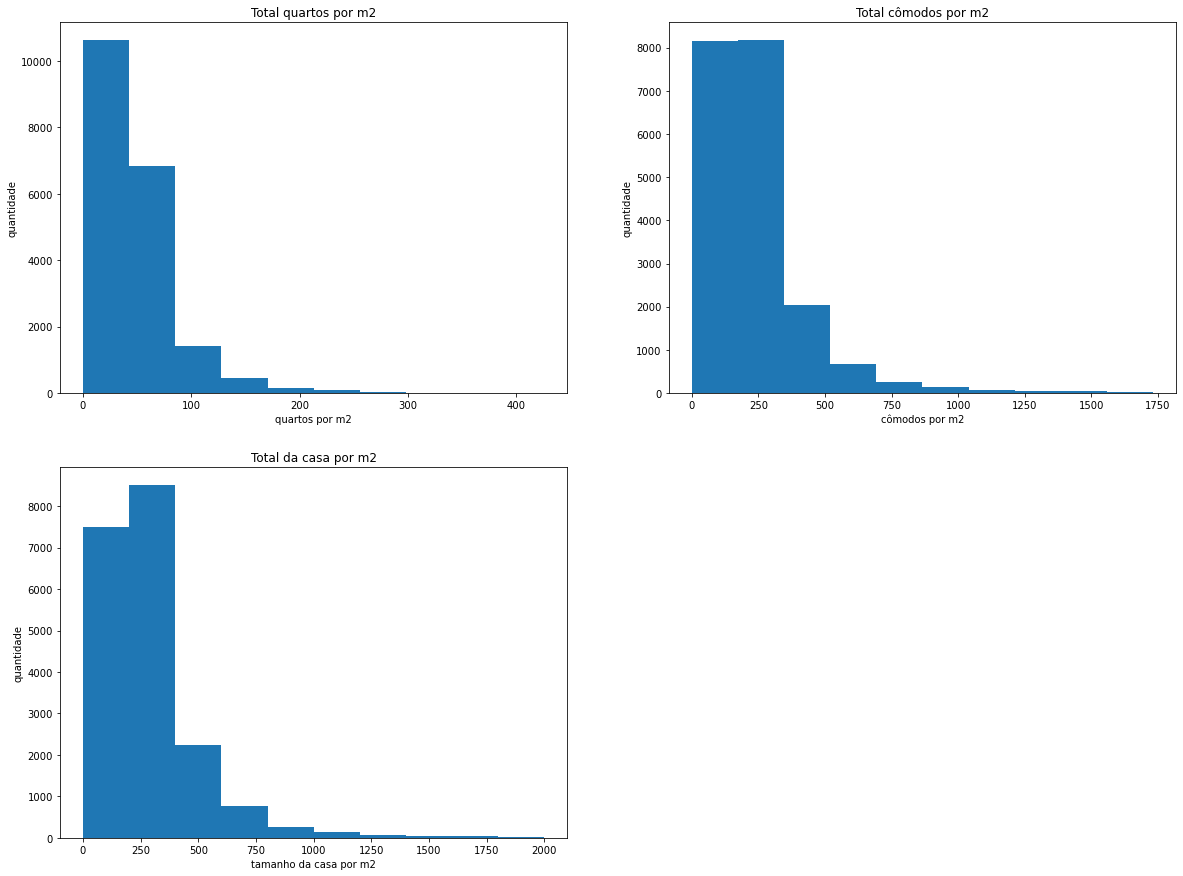

In [28]:
fig = plt.figure(figsize = (20, 15))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)


ax1.hist(housing.total_bedrooms_m2)
ax2.hist(housing.total_rooms_m2)
ax3.hist(housing.total_size_m2)

ax1.set_title('Total quartos por m2')
ax2.set_title('Total cômodos por m2')
ax3.set_title('Total da casa por m2')

ax1.set_xlabel('quartos por m2')
ax1.set_ylabel('quantidade')

ax2.set_xlabel('cômodos por m2')
ax2.set_ylabel('quantidade')

ax3.set_xlabel('tamanho da casa por m2')
ax3.set_ylabel('quantidade')

Os histogramas tem uma tendência à esquerda

##  3) Uma casa próxima ao oceano interfere no preço médio?

In [29]:
ocean_grouped_housing_value = housing.groupby('ocean_proximity')[['median_house_value']].mean()

<BarContainer object of 5 artists>

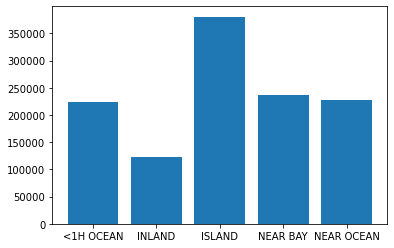

In [30]:
plt.bar(ocean_grouped_housing_value.index, ocean_grouped_housing_value.median_house_value)

Quanto mais próxima do oceano a casa estiver, maior vai ser o seu valor médio.

## 4) O salário médio interfere no preço médio da casa

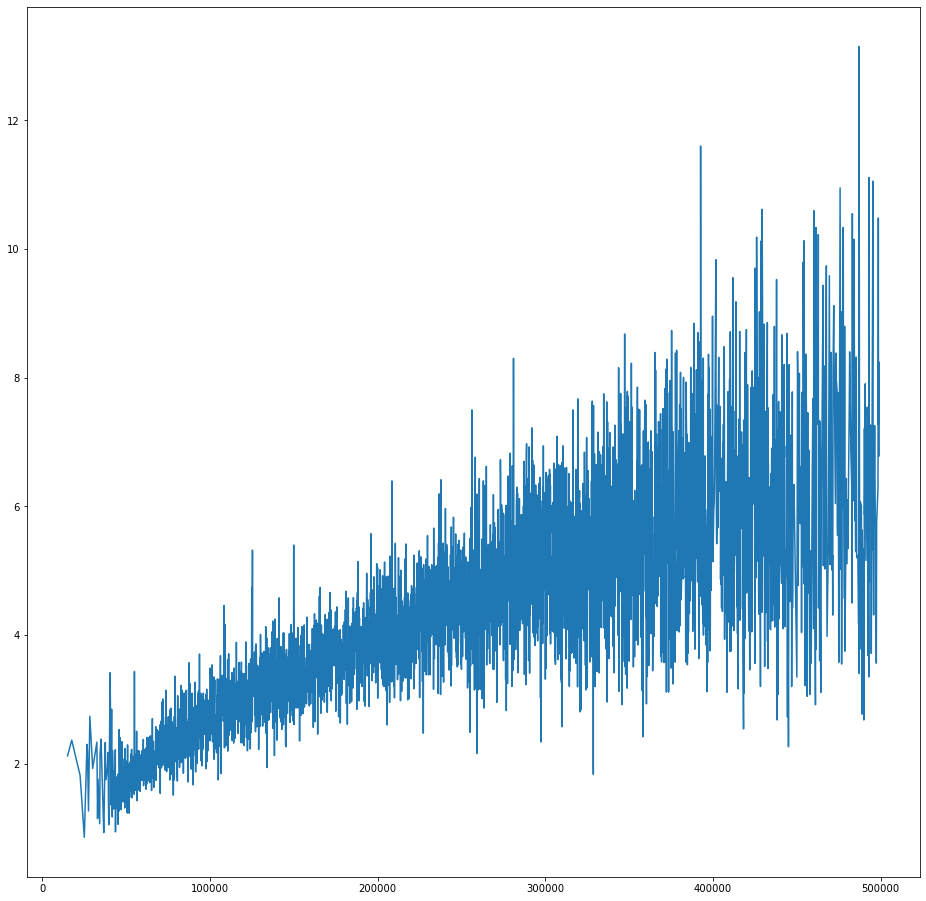

In [31]:
fig, ax = plt.subplots(figsize = (16, 16))
grouped_median_house_value = housing.groupby('median_house_value').mean()

ax.plot(grouped_median_house_value.index, grouped_median_house_value.median_income)

insights:

Quanto maior o salário, mais cara é a média de preço da casa

salario vs preco da casa

variação de mercado vs valor médio das casas pode ser uma hipótese para variação maior conforme a casa fica mais cara

In [32]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'total_rooms_m2',
       'total_bedrooms_m2', 'total_size_m2'],
      dtype='object')

## Treino de algoritmo de regressão linear

In [33]:
# Remover features que não precisaremos:
housings_for_train = housing.drop(['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'total_size_m2', 'households'], axis=1)

In [34]:
housings_for_train.groupby('ocean_proximity').count()

,housing_median_age,population,median_income,median_house_value,total_rooms_m2,total_bedrooms_m2
ocean_proximity,,,,,,
<1H OCEAN,8572,8572,8572,8572,8572,8572
INLAND,6508,6508,6508,6508,6508,6508
ISLAND,5,5,5,5,5,5
NEAR BAY,2088,2088,2088,2088,2088,2088
NEAR OCEAN,2433,2433,2433,2433,2433,2433


In [35]:
# ajustar tipo de oceanos por identificador númerico
housings_for_train['ocean_proximity'].replace({
    '<1H OCEAN': 1,
    'INLAND': 2,
    'ISLAND': 3,
    'NEAR BAY': 4,
    'NEAR OCEAN': 5
}, inplace=True)

In [36]:
housings_for_train.groupby('ocean_proximity').count()

,housing_median_age,population,median_income,median_house_value,total_rooms_m2,total_bedrooms_m2
ocean_proximity,,,,,,
1,8572,8572,8572,8572,8572,8572
2,6508,6508,6508,6508,6508,6508
3,5,5,5,5,5,5
4,2088,2088,2088,2088,2088,2088
5,2433,2433,2433,2433,2433,2433


In [37]:
features = housings_for_train.drop('median_house_value', axis=1)
labels = housings_for_train['median_house_value'].copy()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

X = features
y = labels
split_test_size = 0.20

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size)

In [40]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [48]:
housings_for_train

,housing_median_age,population,median_income,median_house_value,ocean_proximity,total_rooms_m2,total_bedrooms_m2
0,41.0,322.0,8.3252,452600.0,4,81.753995,11.984392
1,21.0,2401.0,8.3014,358500.0,4,659.513192,102.749907
2,52.0,496.0,7.2574,352100.0,4,136.287625,17.651431
3,52.0,558.0,5.6431,341300.0,4,118.357488,21.832033
4,52.0,565.0,3.8462,342200.0,4,151.151988,26.012635
...,...,...,...,...,...,...,...
20635,25.0,845.0,1.5603,78100.0,2,154.682274,34.745448
20636,18.0,356.0,2.5568,77100.0,2,64.752880,13.935340
20637,17.0,1007.0,1.7000,92300.0,2,209.401709,45.057599
20638,18.0,741.0,1.8672,84700.0,2,172.798216,37.997027


In [42]:
y_pred = lr_model.predict(X_test)

In [43]:
import math
math.sqrt(mean_squared_error(y_test,y_pred))

66191.96743151573

In [44]:
lr_model.score(X_test,y_test)

0.5308040176762748

In [49]:
lr_model.predict(np.array([[41, 300, 8.0, 4, 78.00, 10.00]]))

array([416500.72108052])

In [60]:
lr_model.predict(np.array([[20, 322, 2.0, 4, 80.00, 10.00]]))

array([85923.20241775])